# Design of DNA based Color Images Cryptosystem and its Security Analysis


In [1]:
from IPython.display import display, HTML
print("Encryption FLow Chart")
display(HTML(f'<img src="..\images\Lenna\EFlowChart.jpg" style=" width:600; height: 700px;">'))

Encryption FLow Chart


# Import Cryptosystem

In [2]:
from CryptoSystem import Cryptosystem, Encryption, Decryption

## Import Image

In [3]:
import cv2
image = cv2.imread('../Lenna256/lenna.png')

## Generating 240 bits Secret Key for parameters of 2D-MCCM

This security key is used to generate the initial conditions of 2D-MCCM. It contains 7 parts {a, b, x0, y0, T, C1, C2}.
They are lengths of 40 bits, 40 bits, 40 bits, 40 bits, 40 bits, 20 bits and 20 bits respectively.

In [4]:
x = Cryptosystem(image)

m,n: 256 256


In [6]:
key= x.getSymmetricKey(240)

Symmetric Key (hexadecimal): 9ca7fdfb4f2eacf34b875fca99e31244eb212987f9c3f6398df935957091 with length: 60
binary key: 
 100111001010011111111101111110110100111100101110101011001111001101001011100001110101111111001010100110011110001100010010010001001110101100100001001010011000011111111001110000111111011000111001100011011111100100110101100101010111000010010001 
 length of key: 240


### Initial Parameters for MCCM map

In [7]:
a,b,x0,y0 = x.generateInitials(key)

print('a = ',a)
print('b = ',b)
print('x0 = ',x0)
print('y0 = ',y0)

a =  16.02294052749516
b =  17.69146199824838
x0 =  -0.4525657894862496
y0 =  0.8652345558869647


## Getting Initial Vector IV

In [8]:
IV = x.getInitialVector(8,a,b,x0,y0)

## Getting Rule Map

In [11]:
RM = x.getRuleMap(a,b,8)

No of times rule present in rule map
{1: 34860, 2: 34689, 3: 32238, 4: 32083, 5: 32072, 6: 32043, 7: 32085, 8: 32074}


In [12]:
import pandas as pds
rmdf = pds.DataFrame(RM)
rmdf

,0,1,2,3
0,7,2,6,4
1,3,2,7,7
2,1,7,1,3
3,8,3,2,1
4,1,7,5,4
...,...,...,...,...
65531,8,6,2,7
65532,2,4,5,7
65533,5,4,7,8
65534,7,4,1,8


## DNA substitution Map

In [13]:
DSM = x.getDSMMap(a,b,RM)

No of times Neucleotides present in DSMap
{'A': 65516, 'C': 65998, 'T': 65451, 'G': 65179}


In [14]:
print("256*(256*(8/2)) =",len(DSM))

256*(256*(8/2)) = 262144


In [15]:
dsmdf = pds.DataFrame(DSM)
dsmdf

,0
0,A
1,A
2,A
3,C
4,T
...,...
262139,G
262140,G
262141,T
262142,A


# Encryption

In [16]:
E = Encryption(image)

Displaying the pixel matrices over the Image


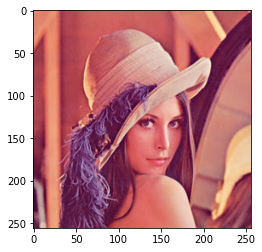

In [17]:
r,g,b = E.matrices()

## a) Mix Rows

In [20]:
mixedImageR = E.MixRows(r,IV)
mixedImageG = E.MixRows(g,IV)
mixedImageB = E.MixRows(b,IV)

## b) ACM Algorithm

In [21]:
imgacmR,imgacmG,imgacmB = E.applyACM(mixedImageR,mixedImageG,mixedImageB)

m= 256, n= 256,
N(length of side) = 256,
alpha(number of squares) = 1,
L(an extra length) = 0,
eta(length of overlapping except last) = 256, k = 127.
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 

## c) Mixing

In [23]:
imgmixR = E.Mixing(imgacmR)
imgmixG = E.Mixing(imgacmG)
imgmixB = E.Mixing(imgacmB)

## d) DNA Encoding

In [24]:
encodedR, encodedG, encodedB = [],[],[]
encodedR = E.Encoding(imgmixR,RM)
encodedG = E.Encoding(imgmixG,RM)
encodedB = E.Encoding(imgmixB,RM)

## e) DNA Substitution

In [25]:
substitutedR,substitutedG,substitutedB = [],[],[]
substitutedR = E.Substitution(encodedR,DSM,RM)
substitutedG = E.Substitution(encodedG,DSM,RM)
substitutedB = E.Substitution(encodedB,DSM,RM)

## f) DNA Decoding

In [26]:
PfinalR = E.Decoding(substitutedR,RM)
PfinalG = E.Decoding(substitutedG,RM)
PfinalB = E.Decoding(substitutedB,RM)

finalR = E.toMatrix(PfinalR)
finalG = E.toMatrix(PfinalG)
finalB = E.toMatrix(PfinalB)

## Final Cipher Image

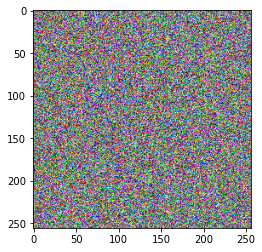

In [30]:
final_cipher_image = E.getFinalCipherImage(finalR,finalG,finalB)

In [31]:
cv2.imshow('The Final Cipher Image',final_cipher_image)
cv2.waitKey(5000)
cv2.destroyAllWindows()

# Decryption

In [37]:
print("Decryption FLow Chart")
display(HTML(f'<img src="..\images\Lenna\DFlowChart.jpg" style=" width:600; height: 700px;">'))

Decryption FLow Chart


In [34]:
D = Decryption(final_cipher_image)

Displaying the pixel matrices over the Image


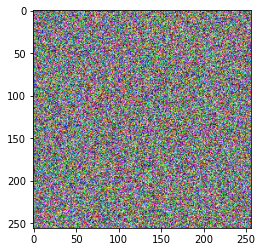

In [35]:
r,g,b = D.matrices()

## a) DNA Encoding

In [39]:
ered   = D.Encoding(r,RM)
eblue  = D.Encoding(b,RM)
egreen = D.Encoding(g,RM)

## b) Reverse Substitution

In [42]:
sred,sblue,sgreen = [],[],[]
sred   = D.rSubstitution(ered,DSM,RM)
sblue  = D.rSubstitution(eblue,DSM,RM)
sgreen = D.rSubstitution(egreen,DSM,RM)

## c) DNA Decoding

In [43]:
dred   = D.Decoding(sred,RM)
dblue  = D.Decoding(sblue,RM)
dgreen = D.Decoding(sgreen,RM)

In [44]:
fred = D.toMatrix(dred)
fblue = D.toMatrix(dblue)
fgreen = D.toMatrix(dgreen)

## d) Reverse Mixing

In [47]:
dmixRed = D.rMixing(fred)
dmixBlue = D.rMixing(fblue)
dmixGreen = D.rMixing(fgreen)

## e) Reverse ACM

In [48]:
dacmr,dacmg,dacmb = D.applyRevACM(dmixRed,dmixGreen,dmixBlue)

m= 256, n= 256,
N(length of side) = 256,
alpha(number of squares) = 1,
L(an extra length) = 0,
eta(length of overlapping except last) = 256, k = 127.
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 

## f) Reverse MixRows

In [50]:
dfinalR = D.rmixRow(dacmr,IV)
dfinalG = D.rmixRow(dacmg,IV)
dfinalB = D.rmixRow(dacmb,IV)

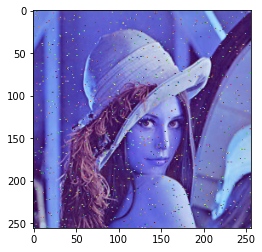

In [52]:
final_decoded_image = D.getDecodedImage(dfinalR,dfinalG,dfinalB)

# Experimental Result and Analysis

In [56]:
from cryptAnlaysis import experimentalAnalysis
ex = experimentalAnalysis(image)

m,n: 256 256


## Histogram Analysis

Histogram of Orignal r,g,b
Displaying the pixel matrices over the Image


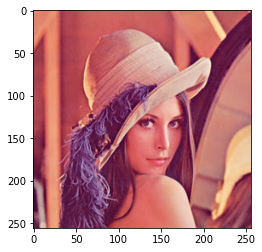

In [59]:
print("Histogram of Orignal r,g,b")
ored,og,ob = E.matrices()

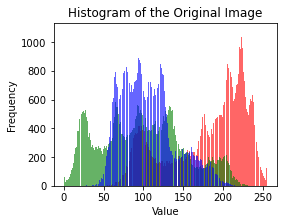

In [60]:
ex.plotHistogram(ored,og,ob,256)

Cipher image histogram


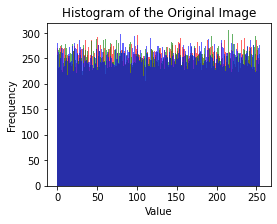

In [61]:
print("Cipher image histogram")
ex.plotHistogram(r,g,b,256)

### Variance

In [65]:
vr = ex.variance(ored)
vg = ex.variance(og)
vb = ex.variance(ob)

vdr = ex.variance(finalR)
vdg = ex.variance(finalG)
vdb = ex.variance(finalB)

In [66]:
print("var of red",vr)
print("var of green",vr)
print("var of blue",vr)
print("var of cipher red",vdr)
print("var of cipher green",vdg)
print("var of cipher blue",vdb)

var of red 2412.122
var of green 2412.122
var of blue 2412.122
var of cipher red 5448.469
var of cipher green 5492.067
var of cipher blue 5437.459


## Chi Square

In [67]:
print("Chi Square of Cipher Red  ",ex.chiSquare(finalR))
print("Chi Square of Cipher Green",ex.chiSquare(finalG))
print("Chi Square of Cipher Blue ",ex.chiSquare(finalB))

Chi Square of Cipher Red   276.6875
Chi Square of Cipher Green 231.0078125
Chi Square of Cipher Blue  258.25


## Entropy

In [68]:
eRed = ex.entropy(ored)
eGreen = ex.entropy(og)
eBlue = ex.entropy(ob)
cRed = ex.entropy(finalR)
cGreen = ex.entropy(finalG)
cBlue = ex.entropy(finalB)

In [70]:
import pandas as pd
columns = ["Original Red", "Original Blue", "Original Green","Cipher Red", "Cipher Blue", "Cipher Green"]
entropy = pd.DataFrame(columns=columns)
row = [eRed,eGreen,eBlue,cRed,cGreen,cBlue]

entropy = entropy.append(pd.Series(row, index=entropy.columns), ignore_index=True)
entropy.index = ['Entropy of Lenna Image']
entropy

C:\Users\HTC\AppData\Local\Temp\ipykernel_11224\869978253.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entropy = entropy.append(pd.Series(row, index=entropy.columns), ignore_index=True)


,Original Red,Original Blue,Original Green,Cipher Red,Cipher Blue,Cipher Green
Entropy of Lenna Image,7.268828,7.59763,6.971601,7.996944,7.997465,7.997163


## Correlation Analysis

In [73]:
import numpy as np 
print('horizontal')
print('=======red========\n',np.corrcoef(ored[0],ored[1])[0][1])
print('\n=======green========\n',np.corrcoef(og[0],og[1])[0][1])
print('\n=======blue========\n',np.corrcoef(ob[0],ob[1])[0][1])
print('\n')
print('=======cipher red========\n',np.corrcoef(finalR[0],finalR[1])[0][1])
print('\n=======cipher green========\n',np.corrcoef(finalG[0],finalG[1])[0][1])
print('\n=======cipher blue========\n',np.corrcoef(finalB[0],finalB[1])[0][1])

horizontal
=======red========
 0.9944025123904919

=======green========
 0.9979729753166932

=======blue========
 0.9845564205925538


=======cipher red========
 0.0807100569509786

=======cipher green========
 -0.022488935543144524

=======cipher blue========
 0.022837370193797023


In [74]:
print('vertical')
print('=======red========\n',np.corrcoef(ored[:,0],ored[:,1])[0][1])
print('\n=======green========\n',np.corrcoef(og[:,0],og[:,1])[0][1])
print('\n=======blue========\n',np.corrcoef(ob[:,0],ob[:,1])[0][1])
print('\n')
print('=======cipher red========\n',np.corrcoef(finalR[:,0],finalR[:,1])[0][1])
print('\n=======cipher green========\n',np.corrcoef(finalG[:,0],finalG[:,1])[0][1])
print('\n=======cipher blue========\n',np.corrcoef(finalB[:,0],finalB[:,1])[0][1])

vertical
=======red========
 0.9956790642322005

=======green========
 0.9935959888903894

=======blue========
 0.9857424212970634


=======cipher red========
 -0.15018763275723268

=======cipher green========
 0.06768174305210224

=======cipher blue========
 0.008889165171362694


In [75]:
print('diagonal')
def getDiagonal(matrix):
    diagOne = []
    diagTwo = []
    for i in range(1,256):
        diagOne.append(matrix[i][i-1])
        diagTwo.append(matrix[i-1][i])
    return np.corrcoef(diagOne,diagTwo)
    
print('=======red========\n',getDiagonal(ored)[0][1])
print('\n=======green========\n',getDiagonal(og)[0][1])
print('\n=======blue========\n',getDiagonal(ob)[0][1])
print('\n')
print('=======cipher red========\n',getDiagonal(finalR)[0][1])
print('\n=======cipher green========\n',getDiagonal(finalG)[0][1])
print('\n=======cipher blue========\n',getDiagonal(finalB)[0][1])


diagonal
=======red========
 0.9433654769978365

=======green========
 0.926840282383002

=======blue========
 0.8702813005697619


=======cipher red========
 0.1268304860666373

=======cipher green========
 -0.039997812308293974

=======cipher blue========
 -0.10639118331363154


## NPCR and UACI

In [89]:
cred = ored.copy()
cblue=ob.copy()
cgreen= og.copy()
print(cred[128][128],cblue[128][128],cgreen[128][128])

#changing one pixel in components
cred[128][128] = 20
cgreen[128][128] = 170
cblue[128][128] = 200
print(cred[128][128],cblue[128][128],cgreen[128][128])

162 71 48
20 200 170


Applying Algorithm Steps one by one

Steps 1: mix rows

Step 2: applying ACM algorithm

m= 256, n= 256,
N(length of side) = 256,
alpha(number of squares) = 1,
L(an extra length) = 0,
eta(length of overlapping except last) = 256, k = 127.
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 
Step 3: applying mixing 

Step 4: applying Encoding

Step 5: applying Substitution

Step 6: applying Decoding


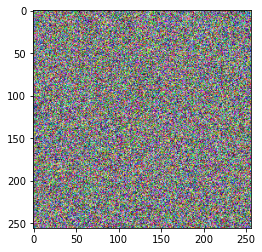

In [90]:
image4DAA = cv2.merge((cblue,cgreen,cred))
cipher = E.applyEncryption(image4DAA,IV,RM,DSM)

In [91]:
finalBD,finalGD,finalRD = cv2.split(cipher)

<center><h3>NPCR and UACI critical values</h3></center>

<img src="..\images\statAttack.jpg">

In [92]:
from DifferentialAttack_Analysis import uaci,npcr

In [93]:
uaciRed = uaci(finalR,finalRD)
uaciGreen = uaci(finalG,finalGD)
uaciBlue = uaci(finalB,finalBD)

print(uaciRed, uaciGreen, uaciBlue)

33.55235380284927 33.4744083180147 33.56845631318934


In [94]:
npcrRed = npcr(finalR,finalRD)
npcrGreen = npcr(finalG,finalGD)
npcrBlue = npcr(finalB,finalBD)

print(npcrRed, npcrGreen, npcrBlue)

99.59869384765625 99.59869384765625 99.59869384765625


In [95]:
columns = ["Red","Green", "Blue"]
npcr = pd.DataFrame(columns=columns)
row = [npcrRed,npcrGreen,npcrBlue]

npcr = npcr.append(pd.Series(row, index=npcr.columns), ignore_index=True)
npcr.index = ['NPCR of Lenna Image']
space = "-" * 13
sentence = f" Critcial NPCR {space} 99.534077"
print(sentence)
npcr

 Critcial NPCR ------------- 99.534077


C:\Users\HTC\AppData\Local\Temp\ipykernel_11224\3555600497.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  npcr = npcr.append(pd.Series(row, index=npcr.columns), ignore_index=True)


,Red,Green,Blue
NPCR of Lenna Image,99.598694,99.598694,99.598694


In [96]:
columns = ["Red","Green", "Blue"]
uaci = pd.DataFrame(columns=columns)
row = [uaciRed,uaciGreen,uaciBlue]

uaci = uaci.append(pd.Series(row, index=uaci.columns), ignore_index=True)
uaci.index = ['UACI of Lenna Image']
space = " " * 5
sentence = f" Critcial UACI {space} 33.159389 - 33.767695 at alpha = 0.001"
print(sentence)
uaci

 Critcial UACI       33.159389 - 33.767695 at alpha = 0.001


C:\Users\HTC\AppData\Local\Temp\ipykernel_11224\3158545156.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  uaci = uaci.append(pd.Series(row, index=uaci.columns), ignore_index=True)


,Red,Green,Blue
UACI of Lenna Image,33.552354,33.474408,33.568456
